# Naive Bayes on Titanic Data with Decision Boundary

In [155]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [156]:
from sklearn.model_selection import train_test_split
import numpy as np

# Drop all rows with missing or inapplicable values
titanic_data = titanic_data.dropna()

# All the features without the target
X = titanic_data.drop('survived', axis=1)

# Use age and fare as features
features = ['age', 'fare']
X_features = np.array(X[features])
# Convert target (survived) to categorical variable
y = titanic_data['survived'].astype('category')

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
print(y_test.dtype)
print(X.head())

category
    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
1        1  female  38.0      1      0  71.2833        C  First  woman   
3        1  female  35.0      1      0  53.1000        S  First  woman   
6        1    male  54.0      0      0  51.8625        S  First    man   
10       3  female   4.0      1      1  16.7000        S  Third  child   
11       1  female  58.0      0      0  26.5500        S  First  woman   

    adult_male deck  embark_town alive  alone  
1        False    C    Cherbourg   yes  False  
3        False    C  Southampton   yes  False  
6         True    E  Southampton    no   True  
10       False    G  Southampton   yes  False  
11       False    C  Southampton   yes   True  


In [157]:
from sklearn.naive_bayes import GaussianNB

# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [158]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes accuracy:", nb_accuracy)
print("Classification report for Naive Bayes:", classification_report(y_test, y_pred_nb))

Naive Bayes accuracy: 0.7297297297297297
Classification report for Naive Bayes:               precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.73      0.92      0.81        24

    accuracy                           0.73        37
   macro avg       0.72      0.65      0.66        37
weighted avg       0.73      0.73      0.70        37


In [159]:
import numpy as np

# Create meshgrid of points to plot the decision boundary
x_min, x_max = X["age"].min() - 0.5, X["age"].max() + 0.5
y_min, y_max = X["fare"].min() - 0.5, X["fare"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

# Make predictions on the meshgrid for NB
nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
nb_pred = nb_pred.reshape(xx.shape)

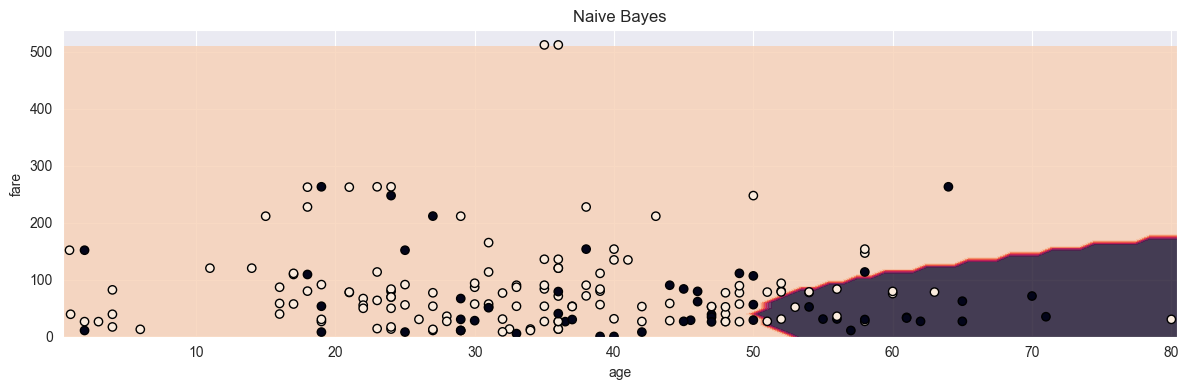

In [160]:
import matplotlib.pyplot as plt

# Plot figure
plt.figure(figsize=(12, 4))
plt.contourf(xx, yy, nb_pred, alpha = 0.8)
plt.scatter(X["age"], X["fare"], c=y, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Naive Bayes')
plt.tight_layout()
plt.show()